# Artificial Intelligence Homework 3
2017, Dec, 17

Use Hill Climbing(HC), Simulated Annealing(SA) and Genetic Algorithm(GA) to optimizing the following function.

$$f(x_1, x_2) = 21.5 + x_1 \, sin(4\pi x_1)+x_2 \, sin(20\pi x_2)$$

$$where\,-3.0 \le x_1 \le 12.1 \, and \, 4.1 \le x_2 \le 5.8$$

required precision is six places after the decimal points.

Reports must include:
- Result comparision for the above three optimization methods
- For GA, you need
    - the fitness curves (best and average of each generation and best-so-far)
    - the effects of population size, generation number, selection scheme, and genetic operator
    - a section of disscusion

## Genetic Algorithm
### Implement
- Using **[GAFT](https://github.com/PytLab/gaft)**, the Python Framwork for genetic algorithm computation.
- Discussion
    - Population Size
        - range from large to small
    - Generation Size
        - observe the plot
    - Selection Scheme
        - Proportionate Roulette Wheel Selection
        - Tournament Selection
        - Linear Ranking Selection
        - Exponential Ranking Selection
        - http://pytlab.org/2017/09/19/遗传算法中几种不同选择算子的比较/
    - Genetic Operator    

In [72]:
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import *
from gaft.analysis.fitness_store import FitnessStore
from gaft.analysis.console_output import ConsoleOutput

from math import sin, cos, pi

# Define Generation
generation = 70

# Define Population and the Constraints
population_size = 100
indv_template = BinaryIndividual(ranges = [(-3, 12.1), (4.1, 5.8)], eps = 0.001)
population = Population(indv_template = indv_template, size = population_size).init()

# Define Genetic Operators
## Selection : RouletteWheelSelection, TournamentSelection, LinearRankingSelection, ExpotentialRankingSelection
selection = RouletteWheelSelection()

## Crossover
### pc : probability of crossover(usually between 0.25 - 1.0)
### pe : gene exchange probability
crossover = UniformCrossover(pc=0.8, pe=0.5)

## Mutate
### pm : The probability of mutation (usually between 0.001 ~ 0.1)
### pbm : The probability of big mutation, usually more than 5 times bigger than pm
### alpha : intensive factor
mutation = FlipBitBigMutation(pm=0.1, pbm=0.55, alpha=0.6)

# Construct GA Engine
engine = GAEngine(population=population, 
                  selection=selection,
                  crossover=crossover, 
                  mutation=mutation,
                  analysis=[ConsoleOutput, FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    x1, x2 = indv.solution
    formula = 21.5 + x1*sin(4*pi*x1) + x2*sin(20*pi*x2)
    return formula

engine.run(ng = generation)
# Best Fitness values are export to best_fit.py

gaft.ConsoleOutput   INFO     Generation number: 70 Population number: 100
gaft.ConsoleOutput   INFO     Generation: 1, best fitness: 34.630, scaled fitness: 34.630
gaft.ConsoleOutput   INFO     Generation: 2, best fitness: 36.453, scaled fitness: 36.453
gaft.ConsoleOutput   INFO     Generation: 3, best fitness: 36.935, scaled fitness: 36.935
gaft.ConsoleOutput   INFO     Generation: 4, best fitness: 36.935, scaled fitness: 36.935
gaft.ConsoleOutput   INFO     Generation: 5, best fitness: 36.935, scaled fitness: 36.935
gaft.ConsoleOutput   INFO     Generation: 6, best fitness: 36.935, scaled fitness: 36.935
gaft.ConsoleOutput   INFO     Generation: 7, best fitness: 36.935, scaled fitness: 36.935
gaft.ConsoleOutput   INFO     Generation: 8, best fitness: 37.159, scaled fitness: 37.159
gaft.ConsoleOutput   INFO     Generation: 9, best fitness: 37.159, scaled fitness: 37.159
gaft.ConsoleOutput   INFO     Generation: 10, best fitness: 37.159, scaled fitness: 37.159
gaft.ConsoleOutput   INF

### Evolution Curve

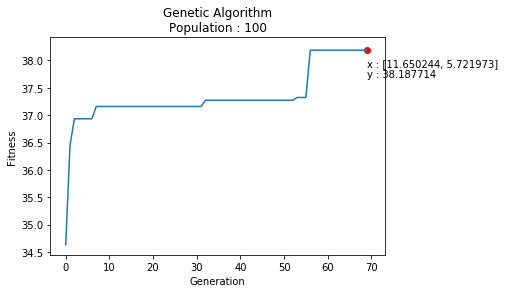

In [101]:
import matplotlib.pyplot as plt
from best_fit_result import best_fit

steps, variants, fits = list(zip(*best_fit))
best_step, best_v, best_f = steps[-1], variants[-1], fits[-1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(steps, fits)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')

# Plot the Maximum
ax.scatter([best_step], [best_f], facecolor='r')
ax.annotate(s='x : [{:.6f}, {:.6f}]\ny : {:.6f}'.format(*best_v, best_f),
                                                     xy=(best_step, best_f),
                                                     xytext=(best_step, best_f-0.5))
plt.title("Genetic Algorithm\nPopulation : 100")
plt.show()

### The Surface

In [114]:
import os
import numpy as np
import mpl_toolkits.mplot3d
from best_fit_result import best_fit
from tqdm import tqdm

ctr = 0

for i, (x, y), z in tqdm(best_fit):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter([x], [y], [z], zorder=99, c='r', s=100)

    x, y = np.mgrid[-4:13:100j, 4:6:100j]
    z = 21.5+x*np.sin(4*np.pi*x) + y*np.sin(20*np.pi*y)
    ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=plt.cm.bone_r)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    if not os.path.exists('./surfaces'):
        os.mkdir('./surfaces')
    fig.savefig('./surfaces/{}.png'.format(i))
    ctr += 1
    plt.close(fig)

100%|██████████| 70/70 [00:34<00:00,  2.04it/s]


### Observe the Effect of Population

In [115]:
# Define Generation
generation = 70

# Define Population and the Constraints
population_size = 50
indv_template = BinaryIndividual(ranges = [(-3, 12.1), (4.1, 5.8)], eps = 0.001)
population = Population(indv_template = indv_template, size = population_size).init()

# Define Genetic Operators
## Selection : RouletteWheelSelection, TournamentSelection, LinearRankingSelection, ExpotentialRankingSelection
selection = RouletteWheelSelection()

## Crossover
### pc : probability of crossover(usually between 0.25 - 1.0)
### pe : gene exchange probability
crossover = UniformCrossover(pc=0.8, pe=0.5)

## Mutate
### pm : The probability of mutation (usually between 0.001 ~ 0.1)
### pbm : The probability of big mutation, usually more than 5 times bigger than pm
### alpha : intensive factor
mutation = FlipBitBigMutation(pm=0.1, pbm=0.55, alpha=0.6)

# Construct GA Engine
engine = GAEngine(population=population, 
                  selection=selection,
                  crossover=crossover, 
                  mutation=mutation,
                  analysis=[ConsoleOutput, FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    x1, x2 = indv.solution
    formula = 21.5 + x1*sin(4*pi*x1) + x2*sin(20*pi*x2)
    return formula

engine.run(ng = generation)
# Best Fitness values are export to best_fit.py

gaft.ConsoleOutput   INFO     Generation number: 70 Population number: 50
gaft.ConsoleOutput   INFO     Generation: 1, best fitness: 35.404, scaled fitness: 35.404
gaft.ConsoleOutput   INFO     Generation: 2, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 3, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 4, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 5, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 6, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 7, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 8, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 9, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO     Generation: 10, best fitness: 36.963, scaled fitness: 36.963
gaft.ConsoleOutput   INFO

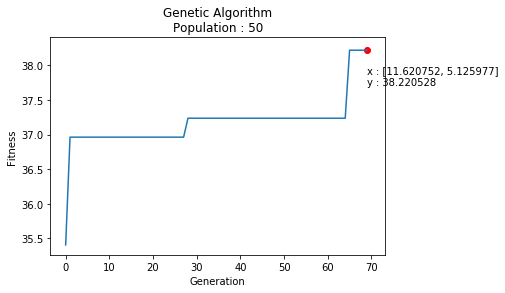

In [122]:
import matplotlib.pyplot as plt
from best_fit_50 import best_fit

steps, variants, fits = list(zip(*best_fit))
best_step, best_v, best_f = steps[-1], variants[-1], fits[-1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(steps, fits)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')

# Plot the Maximum
ax.scatter([best_step], [best_f], facecolor='r')
ax.annotate(s='x : [{:.6f}, {:.6f}]\ny : {:.6f}'.format(*best_v, best_f),
                                                     xy=(best_step, best_f),
                                                     xytext=(best_step, best_f-0.5))
plt.title("Genetic Algorithm\nPopulation : 50")
plt.show()